In [108]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

In [109]:
train = pd.read_csv('Trainfile.csv')
test = pd.read_csv('Testfile.csv')

In [110]:
train = train.drop(columns= ['Idx'])
test = test.drop(columns= ['Idx'])

In [111]:
#converting categorical data to numerical
for i in range(len(train.columns)):
    x = train.iloc[:, i]
    if x.dtype == 'O':
        train.iloc[:, i], u = pd.factorize(train.iloc[:, i])
        test.iloc[:, i], u = pd.factorize(test.iloc[:, i])
train = train.replace(-1, np.nan)

In [112]:
#datafram features
trainStats = train.describe()
train_std = trainStats.loc['std']
train_mean = trainStats.loc['mean']
#train_median = trainStats.loc['median']

testStats = test.describe()
test_std = testStats.loc['std']
test_mean = testStats.loc['mean']
#test_mean = testStats.loc['median']

trainStats

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1138.000000,1138.000000,938.000000,1138.000000,1138.000000,66.000000,1138.000000,1138.000000,1138.0,1138.000000,...,1138.000000,5.00000,224.000000,42.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,57.618629,0.398067,70.484009,10273.514060,0.004394,0.500000,0.419156,1.054482,0.0,0.951670,...,2.434974,0.80000,0.754464,0.095238,40.179262,6.332162,2007.847100,0.367311,0.304921,179328.707381
std,42.519037,0.841260,24.983885,7742.762753,0.066168,0.503831,0.642296,0.420058,0.0,0.619488,...,36.868419,0.83666,0.931500,0.370203,496.795058,2.722983,1.326741,1.057895,0.767176,76642.678880
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,0.000000,59.000000,7560.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129900.000000
50%,50.000000,0.000000,70.000000,9496.000000,0.000000,0.500000,0.000000,1.000000,0.0,1.000000,...,0.000000,1.00000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,162450.000000
75%,70.000000,0.000000,80.000000,11596.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,0.000000,1.00000,1.250000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,210750.000000
max,190.000000,4.000000,313.000000,159000.000000,1.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,648.000000,2.00000,3.000000,2.000000,15500.000000,12.000000,2010.000000,7.000000,5.000000,745000.000000


In [113]:
#Dealing with missing data
for i in range(len(train.columns)):
    train.iloc[:, i] = train.iloc[:, i].fillna(train_mean[i])
    test.iloc[:, i] = test.iloc[:, i].fillna(test_mean[i])

In [114]:
#Feature Scaling
train_use = (train - train_mean)/train_std
test_use = (test - test_mean)/test_std

In [115]:
#Dropping columns with low std
dropcols = []

for i in range(len(train.columns)):
    if train_std[i] <10:
        dropcols.append(i)

train_use = train_use.drop(train_use.columns[dropcols], axis= 1)
test_use = test_use.drop(test_use.columns[dropcols], axis= 1)

In [116]:
train_use.shape

(1138, 24)

In [117]:
#Preparing for data preprocessing
X = train_use.iloc[:, :-1]
y = train_use['SalePrice']

#y returns as an pd.Series, and i need an array so using a conversion hack
y = y.values
y = y.reshape((len(y),1))

#as theta1 is constant
o = np.ones([X.shape[0],1])
X = np.concatenate((o, X), axis= 1)

#features start from 0
theta = np.zeros([1, len(train_use.columns)])
thetaT = theta.T

#learning rate 
alpha = 0.01
nl = 100
#I tried different numbers and this is the most accurate one

In [118]:
#Checking all matrix sizes
m = X @ thetaT - y
print(X.shape)
print(m.shape)
print(theta.shape)
print(y.shape)
len(y)

(1138, 24)
(1138, 1)
(1, 24)
(1138, 1)


1138

In [119]:
#Cost Function
def calc_cost(X, y, theta):
    err = np.power(((X @ theta.T) - y),2)
    return np.sum(err)/(2 * len(X))
it = 1000
#Gradient Descent
def grad_descent(X, y, theta, alpha, it):
    cost = np.zeros(it)
    for i in range(it):
        theta = theta - (alpha/len(X))*np.sum(X * (X @ theta.T - y), axis = 0)
        cost[i] = calc_cost(X, y, theta)

    return theta, cost

In [120]:
#Running the model
feat, cost = grad_descent(X, y, theta, alpha, it)
print(feat)
fin_cost = calc_cost(X, y, feat)
print(fin_cost)

[[-1.40488285e-15 -9.24940131e-02 -2.11482966e-02  2.01824646e-02
   1.76719575e-01  1.57955257e-01  7.55031816e-02  7.73084849e-02
   9.45334673e-03  2.52583236e-02  1.08721160e-01  1.18994835e-01
   1.80316081e-01  5.51407076e-03  2.36725624e-01  1.21803852e-02
   1.47246389e-01  6.98677609e-02  1.46600220e-02  2.49622265e-02
   2.58782011e-02  7.97931212e-02 -2.97610097e-02  6.90278013e-03]]
0.13132949738126606


Text(0.5, 1.0, 'Iterations vs Cost')

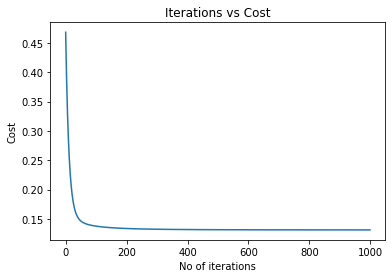

In [121]:
plt.figure()
plt.plot(np.arange(1000), cost)
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost')

In [122]:
X1 = test_use.iloc[:, :-1]
y1 = test_use['SalePrice']
y1 = y1.values.reshape(len(y1), 1)

o = np.ones([X1.shape[0],1])
X1 = np.concatenate((o, X1), axis= 1)

In [123]:
#Predicting y for test
y_pred = X1 @ feat.T

In [124]:
#To remove feature scaling:

test_mean1 = test_mean[-1]
test_std1 = test_std[-1]

y_pred = y_pred * test_std1 + test_mean1
y1 = y1 * test_std1 + test_mean1

In [125]:
#Checking accuracy

mape = 0
for i in range(len(y_pred)):
    mape = mape + abs((y_pred[i] - y1[i])/y1[i])
mape/=3.22
print('Accuracy =', float(100-mape),'%')
#type(mape)


Accuracy = 85.01112713406269 %
